911 Calls Analysis 
Rodrigo Banos Hernandez

In [145]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the csv file as a dataframe
df = pd.read_csv("911.csv")


In [146]:
#Checking each column's type:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lon        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [147]:
#Checking the headers:
df.head()

,lat,lon,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10/12/15 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10/12/15 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10/12/15 17:40,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10/12/15 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10/12/15 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [148]:
#Identifying the top 5 zipcodes for 911 calls:

by_zip = df.groupby("zip")
by_zip["e"].count().nlargest(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: e, dtype: int64

In [149]:
#Identifying the top 5 townships (twp) for 911 calls:

by_twp = df.groupby("twp")
by_twp["e"].count().nlargest(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: e, dtype: int64

In [150]:
#Checking how many unique title codes are there:

df["title"].nunique()

110

In [151]:
#Creating new features
#Extracting the Reason and Description on new columns from each call from the "Title" Field with regular expressions:

df["Reason"] = df["title"].str.extract("(\D+):")
df["Description"] = df["title"].str.extract(":(\D+)")
df

,lat,lon,desc,zip,title,timeStamp,twp,addr,e,Reason,Description
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10/12/15 17:40,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10/12/15 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10/12/15 17:40,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10/12/15 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10/12/15 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,24/08/16 11:06,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,VEHICLE ACCIDENT -
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,24/08/16 11:07,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,VEHICLE ACCIDENT -
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,24/08/16 11:12,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,FALL VICTIM
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,24/08/16 11:17,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,NAUSEA/VOMITING


In [152]:
#Identifying he most common Reason for a 911 call based off of this new column:

by_reason = df.groupby("Reason")
by_reason["e"].count().nlargest(1)

Reason
EMS    48877
Name: e, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

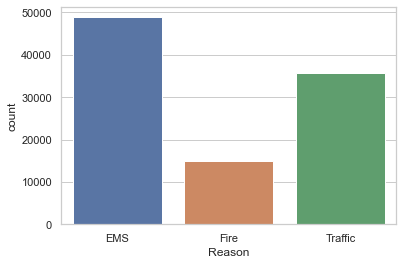

In [153]:
#Creating a countplot for 911 calls by reason with Seaborn:

sns.set_theme(style="whitegrid")
sns.countplot(x='Reason',data=df)

In [154]:
#Identifying the the data type of the objects in the timeStamp column:
type("timeStamp")

str

In [155]:
#Converting the timestamps from str to DateTime objects with Pandas:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

time = df['timeStamp'].iloc[0]
#print(time.hour,":",time.minute)
time


Timestamp('2015-10-12 17:40:00')

In [156]:
#Adding Time, Hour, Month, Month_number, Day Columns from the new timestamp column:

df["Time"] = pd.to_datetime(df["timeStamp"]).dt.time
df["Hour"] = pd.to_datetime(df["timeStamp"]).dt.hour
#df["Month"] = pd.to_datetime(df["timeStamp"]).dt.month_name()
df["Month"] = pd.to_datetime(df["timeStamp"]).dt.month_name().str[:3]
df["Month_number"] = pd.to_datetime(df["timeStamp"]).dt.month
#df["Day"] = pd.to_datetime(df["timeStamp"]).dt.day_name()
df["Day"] = pd.to_datetime(df["timeStamp"]).dt.day_name().str[:3]
df

,lat,lon,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Time,Hour,Month,Month_number,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17:40:00,17,Oct,10,Mon
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17:40:00,17,Oct,10,Mon
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17:40:00,17,Oct,10,Mon
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 17:40:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17:40:00,17,Oct,10,Mon
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 17:40:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17:40:00,17,Oct,10,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,VEHICLE ACCIDENT -,11:06:00,11,Aug,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:00,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,VEHICLE ACCIDENT -,11:07:00,11,Aug,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,FALL VICTIM,11:12:00,11,Aug,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:00,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,NAUSEA/VOMITING,11:17:00,11,Aug,8,Wed


In [157]:
#Exporting modified data frame:

df.to_csv('911_RBH_Analysis.csv',index=False)

<AxesSubplot:xlabel='Day', ylabel='count'>

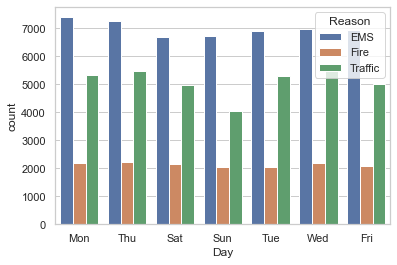

In [158]:
#Making a countplot of the Day of Week column with Reason as hue with seaborn:

sns.set_theme(style="whitegrid")
sns.countplot(x='Day',data=df, hue="Reason")

<AxesSubplot:xlabel='Month', ylabel='count'>

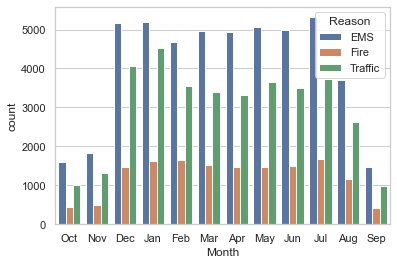

In [159]:
#Making a countplot of the Month column with Reason as hue with seaborn:

sns.set_theme(style="whitegrid")
sns.countplot(x='Month',data=df, hue="Reason")

In [160]:
#Creating a groupby object "by_month", aggregating with the count() method:
#Warning: the column Month disappears

by_month = df.groupby("Month").count()
by_month.head()


,lat,lon,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Time,Hour,Month_number,Day
Month,,,,,,,,,,,,,,,
Apr,9725,9725,9725,8523,9725,9725,9722,9689,9725,9725,9725,9725,9725,9725,9725
Aug,7490,7490,7490,6473,7490,7490,7487,7444,7490,7490,7490,7490,7490,7490,7490
Dec,10683,10683,10683,9277,10683,10683,10676,10621,10683,10683,10683,10683,10683,10683,10683
Feb,9881,9881,9881,8559,9881,9881,9876,9827,9881,9881,9881,9881,9881,9881,9881
Jan,11355,11355,11355,9893,11355,11355,11351,11257,11355,11355,11355,11355,11355,11355,11355


In [161]:
#We reset the index:
#by reseting the index we get the pivot column back

by_month.reset_index()


,Month,lat,lon,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Time,Hour,Month_number,Day
0,Apr,9725,9725,9725,8523,9725,9725,9722,9689,9725,9725,9725,9725,9725,9725,9725
1,Aug,7490,7490,7490,6473,7490,7490,7487,7444,7490,7490,7490,7490,7490,7490,7490
2,Dec,10683,10683,10683,9277,10683,10683,10676,10621,10683,10683,10683,10683,10683,10683,10683
3,Feb,9881,9881,9881,8559,9881,9881,9876,9827,9881,9881,9881,9881,9881,9881,9881
4,Jan,11355,11355,11355,9893,11355,11355,11351,11257,11355,11355,11355,11355,11355,11355,11355
5,Jul,10729,10729,10729,9368,10729,10729,10727,10692,10729,10729,10729,10729,10729,10729,10729
6,Jun,9985,9985,9985,8678,9985,9985,9980,9938,9985,9985,9985,9985,9985,9985,9985
7,Mar,9865,9865,9865,8678,9865,9865,9859,9834,9865,9865,9865,9865,9865,9865,9865
8,May,10191,10191,10191,8856,10191,10191,10187,10136,10191,10191,10191,10191,10191,10191,10191
9,Nov,3647,3647,3647,3110,3647,3647,3645,3632,3647,3647,3647,3647,3647,3647,3647


<AxesSubplot:xlabel='Month'>

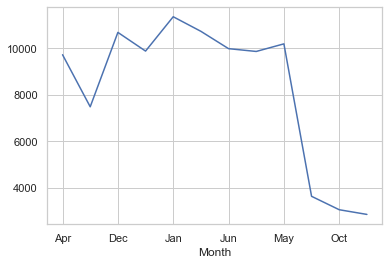

In [162]:
#A simple plot indicating the count of calls per month: 

by_month["e"].plot()

In [163]:
#Creating a new column "Date" to contain the date from the timeStamp column:

df["Date"] = pd.to_datetime(df["timeStamp"]).dt.date
df

,lat,lon,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Time,Hour,Month,Month_number,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17:40:00,17,Oct,10,Mon,2015-10-12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17:40:00,17,Oct,10,Mon,2015-10-12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17:40:00,17,Oct,10,Mon,2015-10-12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 17:40:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17:40:00,17,Oct,10,Mon,2015-10-12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 17:40:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17:40:00,17,Oct,10,Mon,2015-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,VEHICLE ACCIDENT -,11:06:00,11,Aug,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:00,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,VEHICLE ACCIDENT -,11:07:00,11,Aug,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,FALL VICTIM,11:12:00,11,Aug,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:00,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,NAUSEA/VOMITING,11:17:00,11,Aug,8,Wed,2016-08-24


<AxesSubplot:xlabel='Date'>

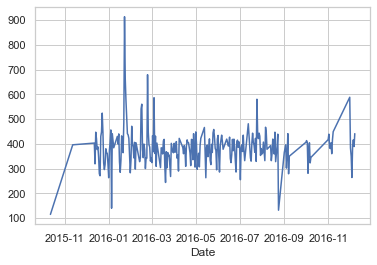

In [164]:
#Grouping by Date, using the count() method and creating a plot of 911 calls:

by_date = df.groupby("Date").count()
by_date["e"].plot()

<AxesSubplot:xlabel='Date'>

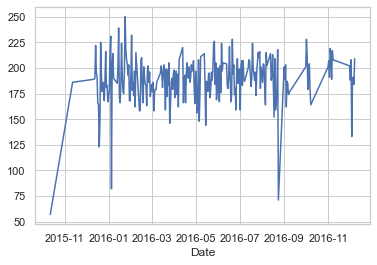

In [165]:
#creating a plot of 911 calls per Reason:

#EMS
df_EMS = df.copy()
df_EMS = df_EMS.loc[(df_EMS['Reason'] == "EMS")]
by_EMS = df_EMS.groupby("Date").count()
by_EMS["e"].plot()

<AxesSubplot:xlabel='Date'>

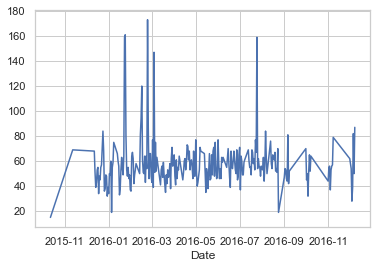

In [166]:
#Fire
df_Fire = df.copy()
df_Fire = df_Fire.loc[(df_Fire["Reason"] == "Fire")]
by_Fire = df_Fire.groupby("Date").count()
by_Fire["e"].plot()

<AxesSubplot:xlabel='Date'>

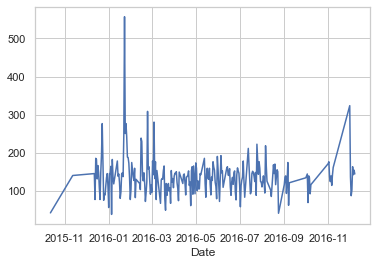

In [167]:
#Traffic
df_Traff = df.copy()
df_Traff = df_Traff.loc[(df_Traff['Reason'] == "Traffic")]
by_Traff = df_Traff.groupby("Date").count()
by_Traff["e"].plot()

In [168]:
#Unstacking and grouping by to create a pivot table based on day and hour:

#one liner: #df_day = df[["Day","Hour","e"]].groupby(["Day","Hour"]).count().unstack(level=1)
df_day = df[["Day","Hour","e"]].groupby(["Day","Hour"]).count()
df_day = df_day.unstack(level=1)
df_day

e                                               ...                  \
Hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16   
Day                                                     ...                   
Fri   283  220  211  184  214  207  379  551  751  699  ...  880  862   944   
Mon   279  228  215  191  205  265  377  637  766  793  ...  859  952  1014   
Sat   355  266  221  244  229  249  305  482  584  683  ...  812  824   874   
Sun   353  296  274  227  199  221  335  527  517  665  ...  774  756   764   
Thu   296  231  233  183  188  204  360  564  771  795  ...  893  975   954   
Tue   283  247  189  188  218  237  367  604  769  807  ...  910  885   973   
Wed   263  233  206  218  165  246  390  605  886  872  ...  869  900   967   

                                          
Hour    17   18   19   20   21   22   23  
Day                                       
Fri    947  785  659  593  489  477  419  
Mon   1031  898  818  670  536  492  328  
Sat    875  823  712  619  551  492  396  
Sun    766  715  628  561  524  445  359  
Thu    985  848  737  716  648  470  411  
Tue    927  819  680  534  463  421  293  
Wed    986  874  674  684  577  486  353  

[7 rows x 24 columns]

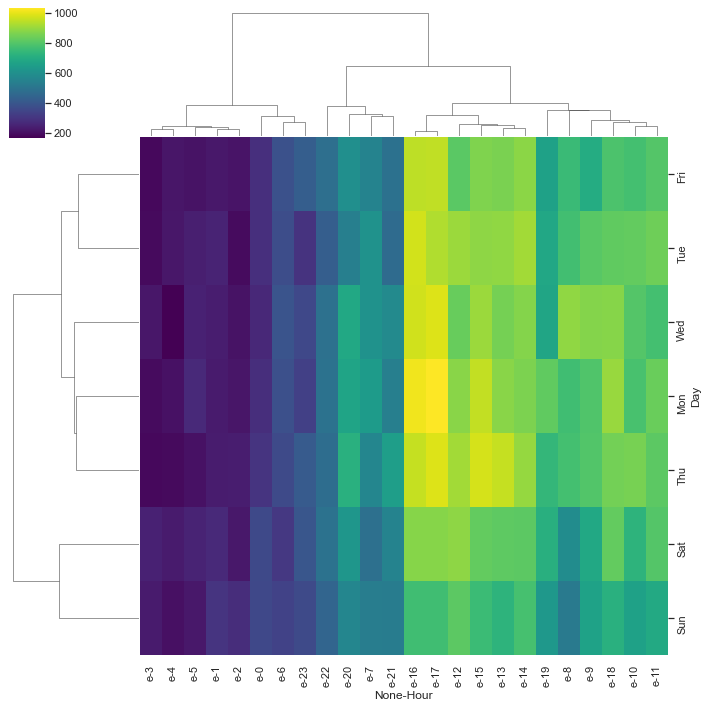

In [169]:
#Creating a clustermap with the new dataframe based on day and hour:

d = sns.clustermap(df_day, cmap="viridis")

In [170]:
#Unstacking and grouping by to create a pivot table based on day and month number:

#df_month = df[["Month","Hour","e"]].groupby(["Month","Hour"]).count()unstack(level=1)
df_month = df[["Day","Month_number","e"]].groupby(["Day","Month_number"]).count()
df_month = df_month.unstack(level=1)
df_month

e                                                           \
Month_number    1     2     3     4     5     6     7     8    9    10   11   
Day                                                                           
Fri           1995  1138  1359  1956  1622  1100  1907   779  380  323  381   
Mon           1364  1966  1463  1217  1481  1617  1381  1486  357  521  417   
Sat           1965  1497   980  1412  1467  1063  1373  1188  396  751  404   
Sun           1637  1272  1247   989  1822  1025  1421  1133  302  413  360   
Thu           1610  1177  1494  1495  1197  1568  1646   729  715  404  780   
Tue           1077  1373  1797  1174  1476  1650  1258  1221  441  281  866   
Wed           1707  1458  1525  1482  1126  1962  1743   954  279  378  439   

                    
Month_number    12  
Day                 
Fri           1053  
Mon           1650  
Sat           1328  
Sun           1171  
Thu           2180  
Tue           1650  
Wed           1651

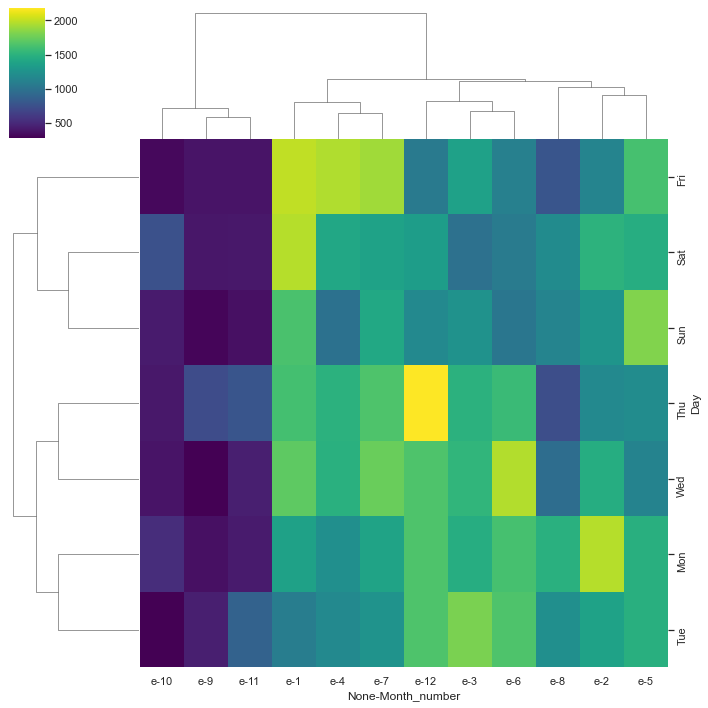

In [171]:
#Creating a clustermap with the new dataframe based on day and month number:
m = sns.clustermap(df_month, cmap="viridis")